In [1]:
# 02_entity_similarity_analysis
#
# created by LuYF-Lemon-love <luyanfeng_nlp@qq.com> on March 4, 2023
# updated by LuYF-Lemon-love <luyanfeng_nlp@qq.com> on March 5, 2023
#
# 该脚本展示了如何分析训练的实体嵌入.
#
# 需要的包:
#          numpy
#          csv
#          matplotlib
#          sklearn
#          MulticoreTSNE, 安装命令为:
#                pip install cmake==3.18.4 -i https://pypi.tuna.tsinghua.edu.cn/simple
#                pip install MulticoreTSNE -i https://pypi.tuna.tsinghua.edu.cn/simple
#
# 需要的文件:
#          ../01-model/ckpts/RotatE_All_DRKG_0/All_DRKG_RotatE_entity.npy
#          ../../data/drkg/entities.tsv
#
# 源教程链接: https://github.com/gnn4dr/DRKG/blob/master/embedding_analysis/Entity_similarity_analysis.ipynb

# DRKG Entity Embedding Similarity Analysis

这个 notebook 展示了如何分析训练的实体嵌入.

在这个例子中, 我们首先加载训练的实体嵌入向量, 然后将它们映射回原始的实体名, 最后应用下面方法分析它们:

- 投射实体嵌入进入低维空间并可视化它们的分布.

In [2]:
import numpy as np
import csv
import sklearn
import matplotlib.pyplot as plt
from MulticoreTSNE import MulticoreTSNE as TSNE
from sklearn.decomposition import PCA

## Loading Entity ID Mapping

In [3]:
entity2id = {}
id2entity = {}

with open("../../data/drkg/entities.tsv", newline='', encoding='utf-8') as csvfile:
    reader = csv.DictReader(csvfile, delimiter='\t', fieldnames=['id','entity'])
    for row_val in reader:
        id = row_val['id']
        entity = row_val['entity']

        entity2id[entity] = int(id)
        id2entity[int(id)] = entity

print("Number of entities: {}".format(len(entity2id)))

Number of entities: 97238


## Loading Entity Embeddings

In [4]:
entity_emb = np.load('../01-model/ckpts/RotatE_All_DRKG_0/All_DRKG_RotatE_entity.npy')
print(entity_emb.shape)

(97238, 400)


## General Entity Embedding Clustering

这里我们使用 PCA 和 t-SNE 将实体嵌入降维, 然后可视化它们的分布.

In [5]:
# 将实体按照源数据集分类
dataset_id = {}
for entity_name, i in entity2id.items():
    entity_key = entity_name.split('::')[0]
    if dataset_id.get(entity_key, None) is None:
        dataset_id[entity_key] = []
    dataset_id[entity_key].append(i)

In [6]:
# 遵从 scikit-learn 官方的建议, 利用 PCA 先将 entity_emb 降维到 30
# https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html#sklearn.manifold.TSNE
X_embed_PCA = PCA(n_components = 30).fit_transform(entity_emb)

In [7]:
# 降维并转置
X_embedded = TSNE(n_components=2, n_jobs = 32).fit_transform(X_embed_PCA).T

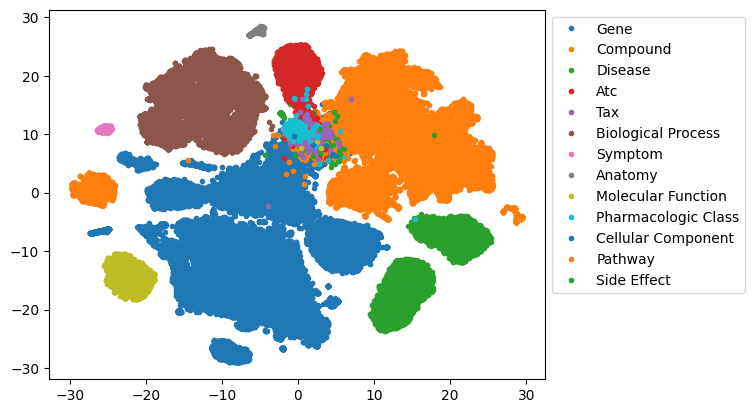

In [8]:
# 绘制
fig = plt.figure()
ax = fig.add_subplot(111)

for key, val in dataset_id.items():
    val = np.asarray(val, dtype=int)
    ax.plot(X_embedded[0][val], X_embedded[1][val], '.', label=key)

lgd = ax.legend(bbox_to_anchor=(1.0, 1.0))
plt.savefig('./result/entity.svg', bbox_extra_artists=(lgd,), bbox_inches='tight', format='svg')